## Scratch paper

### Demographics

#### AGE

===== Age Summary Table =====
       count       mean        std   min   25%   50%   75%   max
age  60753.0  59.327078  17.224448  18.0  46.0  60.0  74.0  99.0


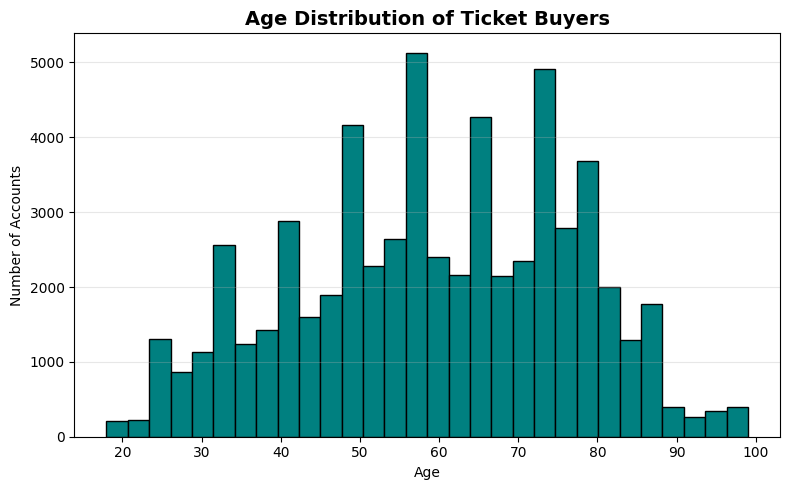

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# Summary Table for Age
age_summary = df['age'].describe().to_frame().T  # convert to table format
print("===== Age Summary Table =====")
print(age_summary)

# Histogram Visualization of Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=30, color='#008080', edgecolor='black')
plt.title('Age Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Accounts')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### EDUCATION

===== Education Summary Table =====
           Education  Count  Percent
         High School  20989    39.13
Vocational/Technical     22     0.04
             College  14228    26.53
     Graduate School  18395    34.30


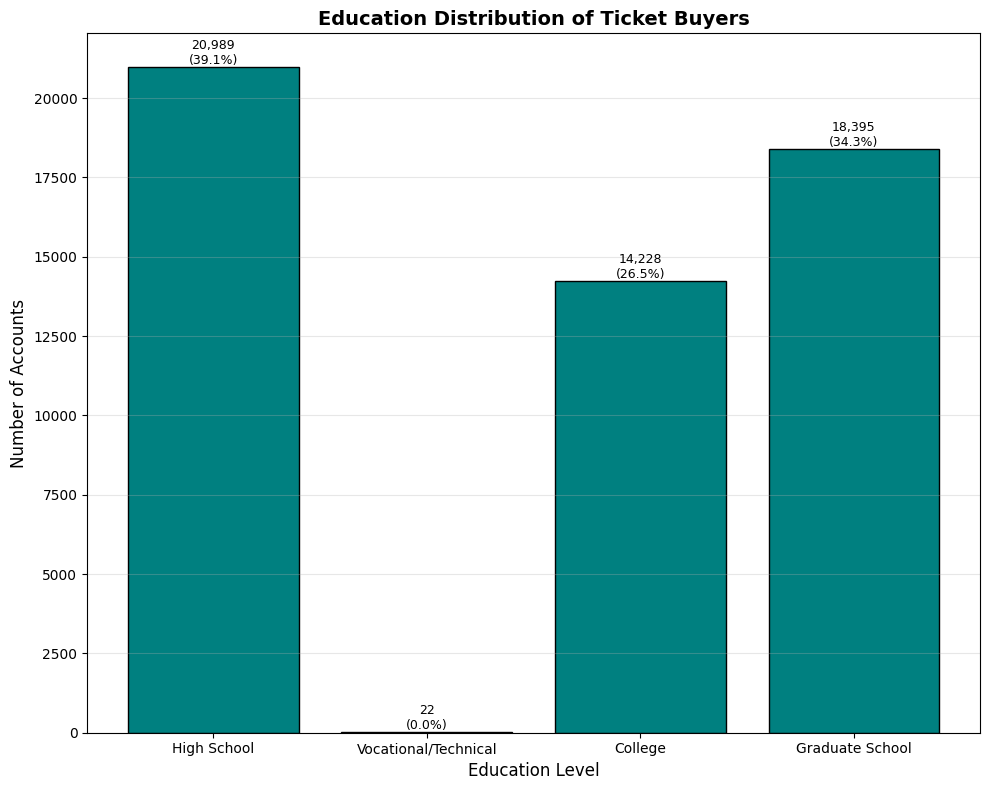

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Define custom order for education levels ===
edu_order = ["High School", "Vocational/Technical", "College", "Graduate School"]

# === Summary table for 'education' ===
edu_counts = df['education'].value_counts(dropna=True)
edu_perc = (edu_counts / edu_counts.sum() * 100).round(2)

summary_table = pd.DataFrame({
    'Education': edu_counts.index,
    'Count': edu_counts.values,
    'Percent': edu_perc.values
})

# Reorder according to the specified order
summary_table['Education'] = pd.Categorical(summary_table['Education'], categories=edu_order, ordered=True)
summary_table = summary_table.sort_values('Education').dropna(subset=['Education'])

print("===== Education Summary Table =====")
print(summary_table.to_string(index=False))

# === Bar chart: Education distribution (custom order) ===
plt.figure(figsize=(10, 8))

bars = plt.bar(
    summary_table['Education'],
    summary_table['Count'],
    width=0.8,
    color='#008080',
    edgecolor='black'
)

# Add count + percent labels above bars
for bar, count, perc in zip(bars, summary_table['Count'], summary_table['Percent']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{count:,}\n({perc:.1f}%)",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Education Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### MARITAL STATUS

===== Marital Status Summary Table =====
     Marital Status  Count  Percent
            Married  33853    50.12
             Single  25893    38.34
Unknown/Unspecified   5338     7.90
    Inferred Single   2210     3.27
   Inferred Married    245     0.36


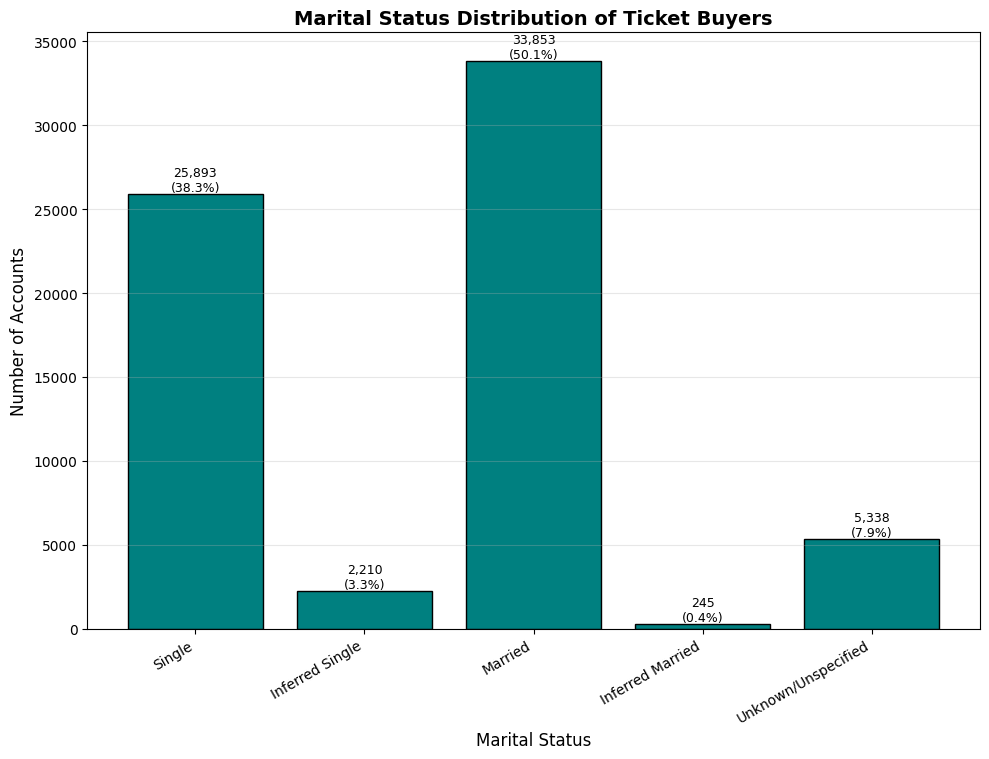

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Prepare marital_status (treat NaN as 'Unknown/Unspecified') ===
marital = df['marital_status'].fillna('Unknown/Unspecified')

# === Summary table: counts + percentages ===
counts = marital.value_counts(dropna=False)
perc = (counts / counts.sum() * 100).round(2)

summary_table = (
    pd.DataFrame({'Marital Status': counts.index, 'Count': counts.values, 'Percent': perc.values})
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

print("===== Marital Status Summary Table =====")
print(summary_table.to_string(index=False))

# === Custom display order (present categories are kept; others ignored if absent) ===
desired_order = [
    "Single",
    "Inferred Single",
    "Married",
    "Inferred Married",
    "Domestic Partnership",
    "Divorced",
    "Widowed",
    "Other",
    "Unknown/Unspecified",
]

# Reorder by desired_order, then append any unexpected categories at the end
present = [x for x in desired_order if x in counts.index]
others  = [x for x in counts.index if x not in present]
order = present + others

ordered = summary_table.set_index('Marital Status').loc[order].reset_index()

# === Bar chart: Marital Status distribution (thick bars + labels) ===
plt.figure(figsize=(10, 7.7))
bars = plt.bar(ordered['Marital Status'], ordered['Count'], width=0.8, edgecolor='black', color='#008080')

# Annotate each bar with count and percent
for bar, c, p in zip(bars, ordered['Count'], ordered['Percent']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{c:,}\n({p:.1f}%)",
             ha='center', va='bottom', fontsize=9)

plt.title('Marital Status Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# === Optional: save outputs ===
# summary_table.to_csv("marital_status_summary.csv", index=False)
# plt.savefig("marital_status_distribution.png", dpi=300, bbox_inches='tight')


#### GENDER

===== Gender Summary Table =====
 Gender  Count  Percent
   Male  44228    65.49
 Female  17142    25.38
Unknown   6169     9.13


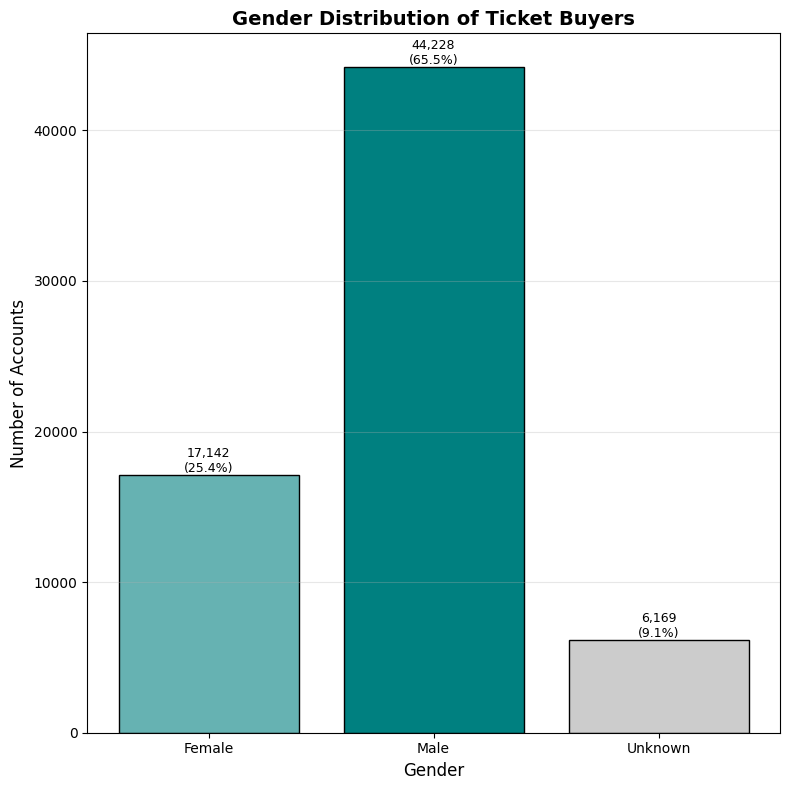

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean and unify 'gender' column ===
gender = df['gender'].fillna('Unknown')
gender = gender.replace({
    'Unknown/Unspecified': 'Unknown',
    'Unspecified': 'Unknown'
})

# === Summary table: counts + percentages ===
counts = gender.value_counts()
perc = (counts / counts.sum() * 100).round(2)

summary_table = (
    pd.DataFrame({'Gender': counts.index, 'Count': counts.values, 'Percent': perc.values})
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

print("===== Gender Summary Table =====")
print(summary_table.to_string(index=False))

# === Custom order for cleaner chart ===
desired_order = ["Female", "Male", "Nonbinary", "Other", "Unknown"]
present = [x for x in desired_order if x in summary_table['Gender'].values]
others = [x for x in summary_table['Gender'] if x not in present]
order = present + others

ordered = summary_table.set_index('Gender').loc[order].reset_index()

# === Bar chart: Gender distribution ===
plt.figure(figsize=(8, 8))
bars = plt.bar(
    ordered['Gender'],
    ordered['Count'],
    color=['#66b2b2' if g == 'Female' else '#008080' if g == 'Male' else '#CCCCCC' for g in ordered['Gender']],
    edgecolor='black',
    width=0.8
)

# Annotate count and percent above each bar
for bar, c, p in zip(bars, ordered['Count'], ordered['Percent']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{c:,}\n({p:.1f}%)",
        ha='center', va='bottom', fontsize=9
    )

plt.title('Gender Distribution of Ticket Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# === Optional: export table/figure ===
# summary_table.to_csv("gender_summary_table.csv", index=False)
# plt.savefig("gender_distribution.png", dpi=300, bbox_inches='tight')


# Revenue

## Revenue by Fiscal Year

===== Revenue Summary by Season Period =====
fiscal_year Total_Revenue Avg_Ticket_Price  Tickets_Sold
       FY24 $3,931,266.43          $111.89         35134
       FY23 $3,268,443.62          $100.86         32405


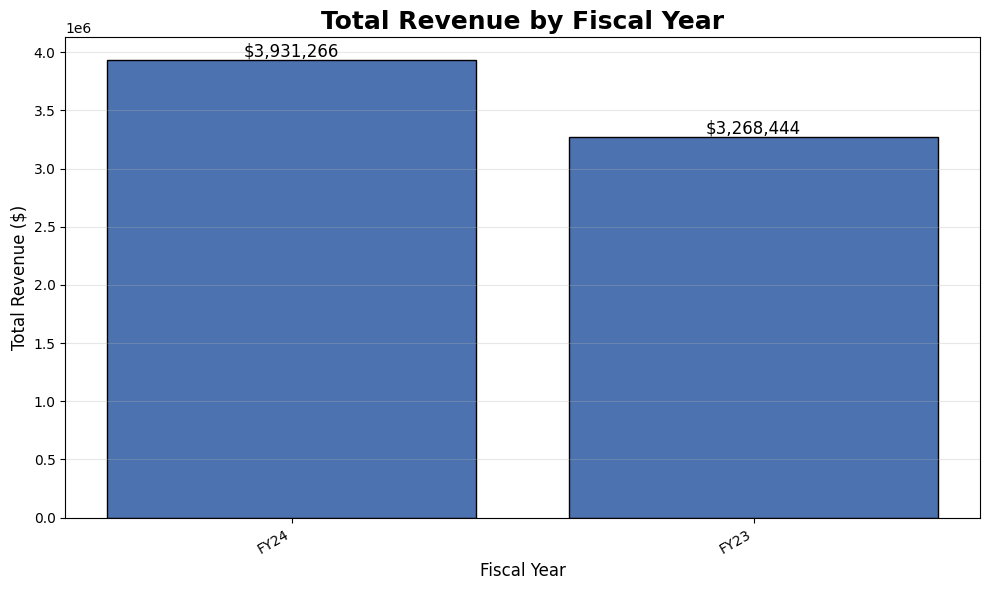

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load dataset ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Check for missing values in relevant columns ===
df = df.dropna(subset=['fiscal_year', 'paid_amount'])

# === Compute total revenue by season_period ===
revenue_by_FY = (
    df.groupby('fiscal_year', as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# Add average and count for context (optional)
summary = (
    df.groupby('fiscal_year')['paid_amount']
      .agg(Total_Revenue='sum', Avg_Ticket_Price='mean', Tickets_Sold='count')
      .reset_index()
      .sort_values('Total_Revenue', ascending=False)
)

print("===== Revenue Summary by Season Period =====")
print(summary.to_string(index=False, formatters={'Total_Revenue': '${:,.2f}'.format,
                                                 'Avg_Ticket_Price': '${:,.2f}'.format}))

# === Bar Chart: Total Revenue by Season Period ===
plt.figure(figsize=(10, 6))
bars = plt.bar(summary['fiscal_year'], summary['Total_Revenue'],
               color='#4C72B0', edgecolor='black', width=0.8)

# Annotate each bar with formatted revenue
for bar, rev in zip(bars, summary['Total_Revenue']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"${rev:,.0f}",
        ha='center', va='bottom', fontsize=12
    )

plt.title('Total Revenue by Fiscal Year', fontsize=18, fontweight='bold')
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Revenue by Season by Fiscal Year


===== Revenue by Season — FY23 =====
season_period Total_Revenue Share_%
         Peak $1,220,358.22   37.3%
   Mid-Season $1,061,911.20   32.5%
      Opening   $528,848.80   16.2%
   Off-Season   $264,493.55    8.1%
       Finale   $192,831.85    5.9%

===== Revenue by Season — FY24 =====
season_period Total_Revenue Share_%
         Peak $1,618,591.68   41.2%
   Mid-Season $1,298,415.30   33.0%
      Opening   $481,490.90   12.2%
   Off-Season   $352,306.45    9.0%
       Finale   $180,462.10    4.6%


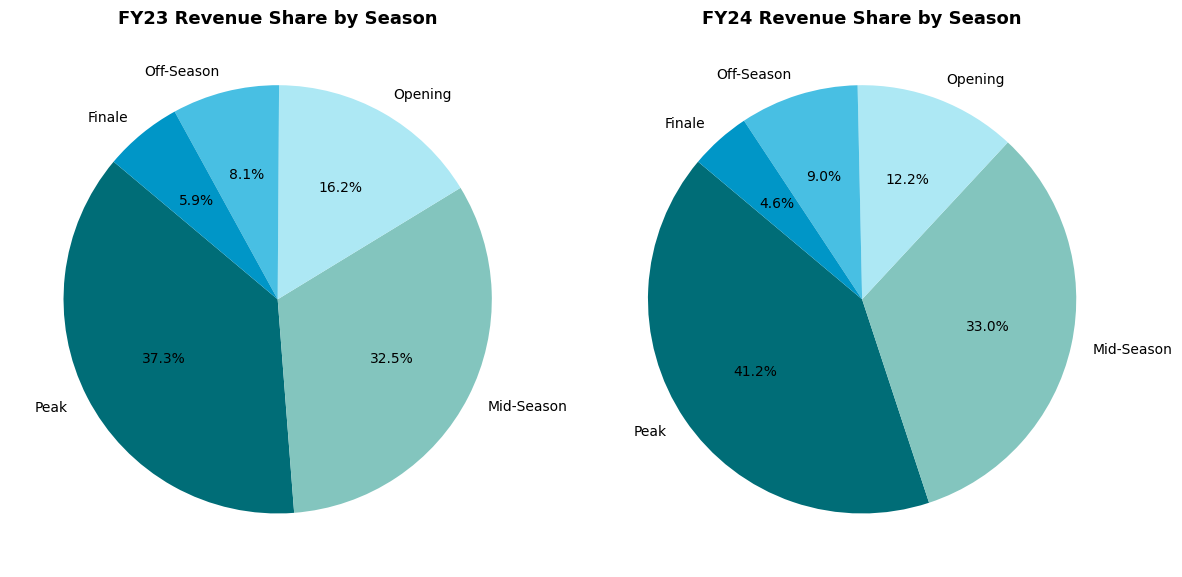

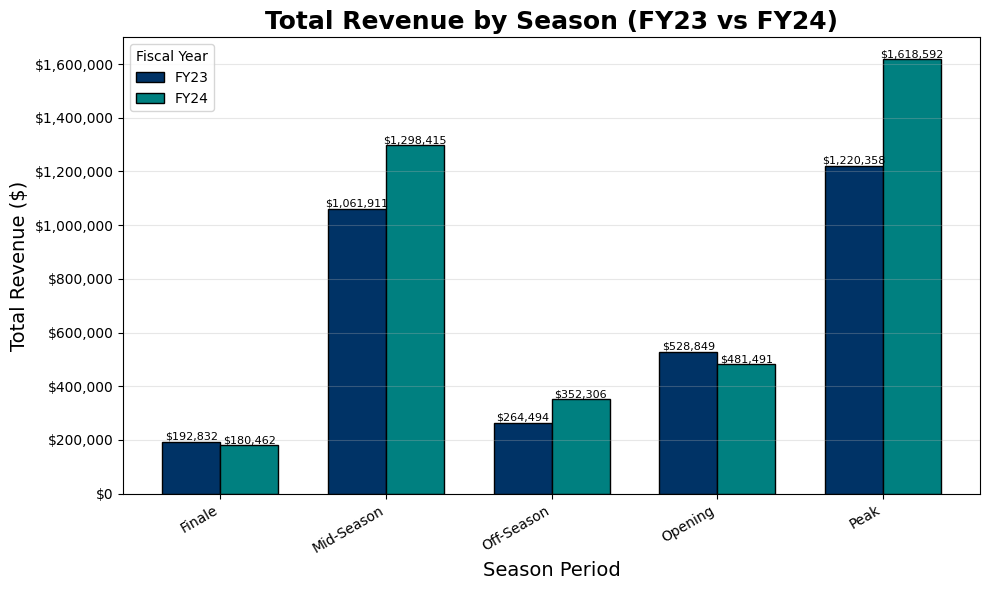

In [64]:
from matplotlib.ticker import FuncFormatter

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# --- Clean columns we need ---
# coerce paid_amount to numeric in case of stray strings
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['paid_amount', 'season_period', 'fiscal_year'])

# Keep only FY23 and FY24 if they exist
target_fys = ['FY23', 'FY24']
present_fys = [fy for fy in target_fys if fy in df['fiscal_year'].unique()]
if not present_fys:
    raise ValueError("Neither FY23 nor FY24 found in the 'fiscal_year' column.")

# === Compute revenue by season_period within each fiscal year ===
rev = (
    df[df['fiscal_year'].isin(present_fys)]
    .groupby(['fiscal_year', 'season_period'], as_index=False)['paid_amount']
    .sum()
    .rename(columns={'paid_amount': 'Total_Revenue'})
)

# Optional: order seasons by descending revenue within each FY for nicer pies
# (You can remove this if you prefer alphabetical or a custom order.)
rev = rev.sort_values(['fiscal_year', 'Total_Revenue'], ascending=[True, False])

# Print summary tables for each FY
for fy in present_fys:
    sub = rev[rev['fiscal_year'] == fy].copy()
    sub['Share_%'] = sub['Total_Revenue'] / sub['Total_Revenue'].sum() * 100
    print(f"\n===== Revenue by Season — {fy} =====")
    print(
        sub[['season_period', 'Total_Revenue', 'Share_%']]
        .to_string(index=False,
                   formatters={
                       'Total_Revenue': '${:,.2f}'.format,
                       'Share_%': '{:.1f}%'.format
                   })
    )

colors = [
    "#006D77", "#83C5BE", "#ADE8F4", "#48BFE3", "#0096C7",
    "#0077B6", "#023E8A", "#80CED7", "#4CA1AF", "#89C2D9"
]

# === Pivot for bar chart (season on x, columns as fiscal years) ===
pivot = rev.pivot(index='season_period', columns='fiscal_year', values='Total_Revenue').fillna(0)

# Keep only present fiscal years/consistent season order
pivot = pivot[present_fys]

# ---------- FIGURE 1: Pie charts for FY23 and FY24 ----------
fig, axes = plt.subplots(1, len(present_fys), figsize=(12, 6), facecolor='none')

if len(present_fys) == 1:
    axes = [axes]  # make iterable

for ax, fy in zip(axes, present_fys):
    sub = rev[rev['fiscal_year'] == fy]
    ax.pie(
        sub['Total_Revenue'],
        labels=sub['season_period'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(sub)]
    )
    ax.set_title(f'{fy} Revenue Share by Season', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------- FIGURE 2: Grouped BAR chart FY23 vs FY24 ----------
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

x = range(len(pivot.index))
bar_width = 0.35

# Currency formatter
fmt = FuncFormatter(lambda y, _: f'${y:,.0f}')
ax.yaxis.set_major_formatter(fmt)

colors_2 = {
    'FY23': '#003366',  # dark blue
    'FY24': '#008080'   # teal
}

# Plot each FY as an offset bar
for i, fy in enumerate(present_fys):
    positions = [p + i * bar_width for p in x]
    bars = ax.bar(positions, pivot[fy].values, width=bar_width, edgecolor='black', label=fy, color=colors_2.get(fy, '#4C72B0'))
    # annotate
    for b in bars:
        ax.text(
            b.get_x() + b.get_width()/2,
            b.get_height(),
            f"${b.get_height():,.0f}",
            ha='center', va='bottom', fontsize=8
        )

# X-axis with season labels centered under groups
center_positions = [p + (bar_width * (len(present_fys)-1) / 2) for p in x]
ax.set_xticks(center_positions)
ax.set_xticklabels(pivot.index, rotation=30, ha='right')

ax.set_title('Total Revenue by Season (FY23 vs FY24)', fontsize=18, fontweight='bold')
ax.set_xlabel('Season Period', fontsize=14)
ax.set_ylabel('Total Revenue ($)', fontsize=14)
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Fiscal Year')
plt.tight_layout()
plt.show()


## Revenue by Program by Fiscal Year

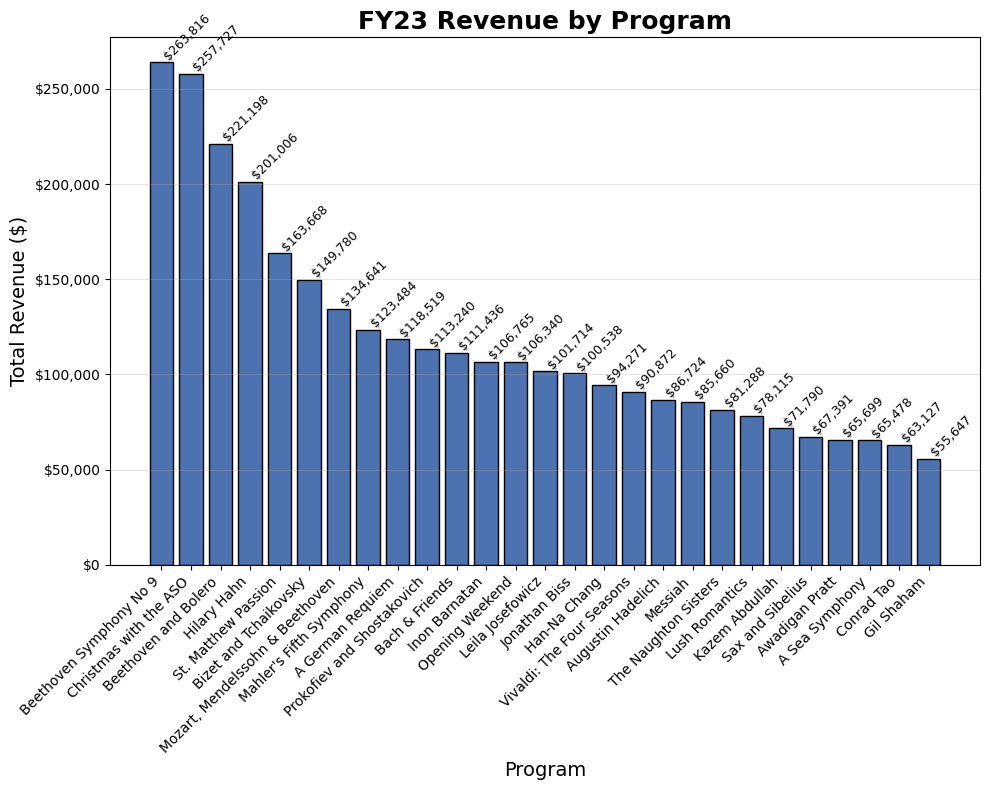

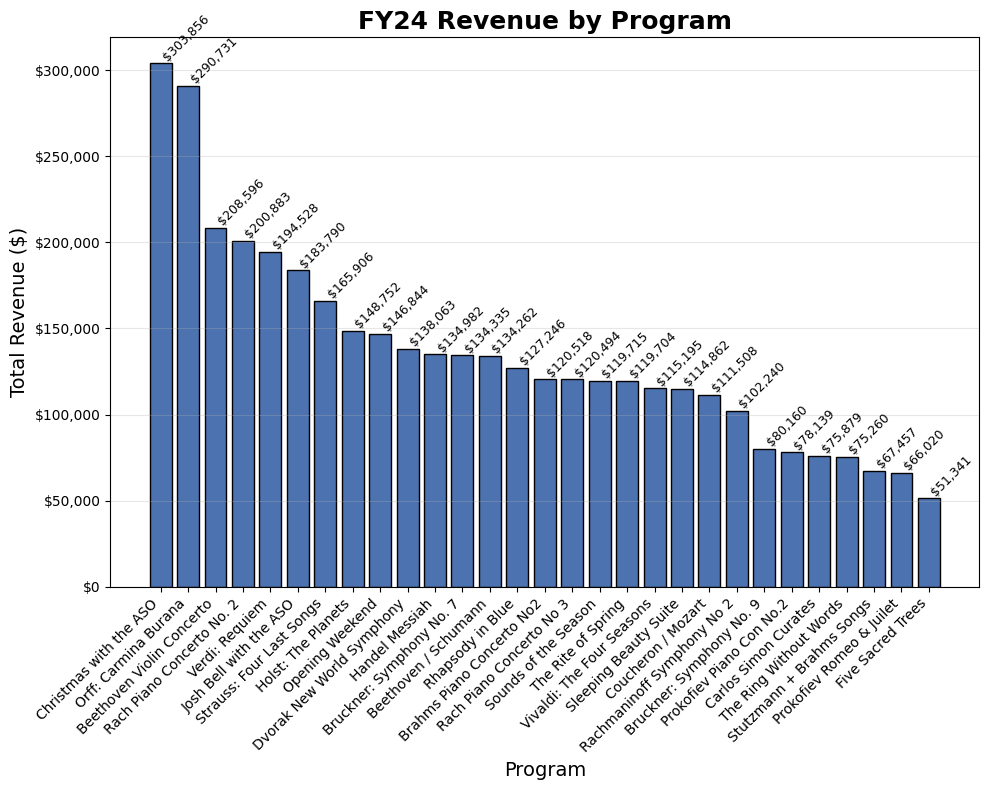

In [18]:
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['Name', 'paid_amount', 'fiscal_year'])

# === Compute revenue by program and fiscal year ===
revenue_by_program = (
    df.groupby(['fiscal_year', 'Name'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# === Helper: format y-axis as currency ===
currency_fmt = FuncFormatter(lambda y, _: f'${y:,.0f}')

# === Define fiscal years to visualize ===
fys = ['FY23', 'FY24']
present_fys = [fy for fy in fys if fy in revenue_by_program['fiscal_year'].unique()]

# === Loop through each fiscal year and plot ===
for fy in present_fys:
    sub = revenue_by_program[revenue_by_program['fiscal_year'] == fy].copy()
    sub = sub.sort_values('Total_Revenue', ascending=False)

    # --- Create bar chart ---
    fig, ax = plt.subplots(figsize=(10, 8), facecolor='none')
    ax.set_facecolor('none')  # transparent chart area too

    bars = ax.bar(sub['Name'], sub['Total_Revenue'], color='#4C72B0', edgecolor='black')

    # Annotate bars with revenue values
    for bar, rev in zip(bars, sub['Total_Revenue']):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"${rev:,.0f}",
            ha='left', va='bottom', fontsize=9, rotation=45
        )

    # --- Chart formatting ---
    ax.yaxis.set_major_formatter(currency_fmt)
    ax.set_title(f'{fy} Revenue by Program', fontsize=18, fontweight='bold')
    ax.set_xlabel('Program', fontsize=14)
    ax.set_ylabel('Total Revenue ($)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

## Revenue by Seat by Fiscal Year

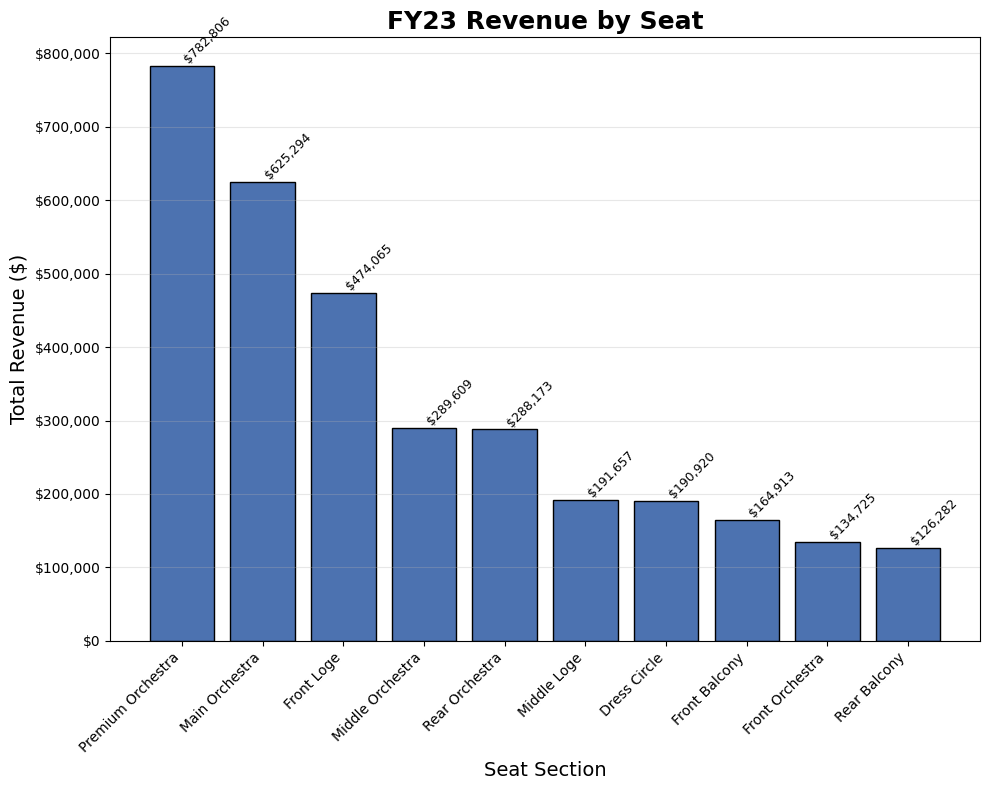

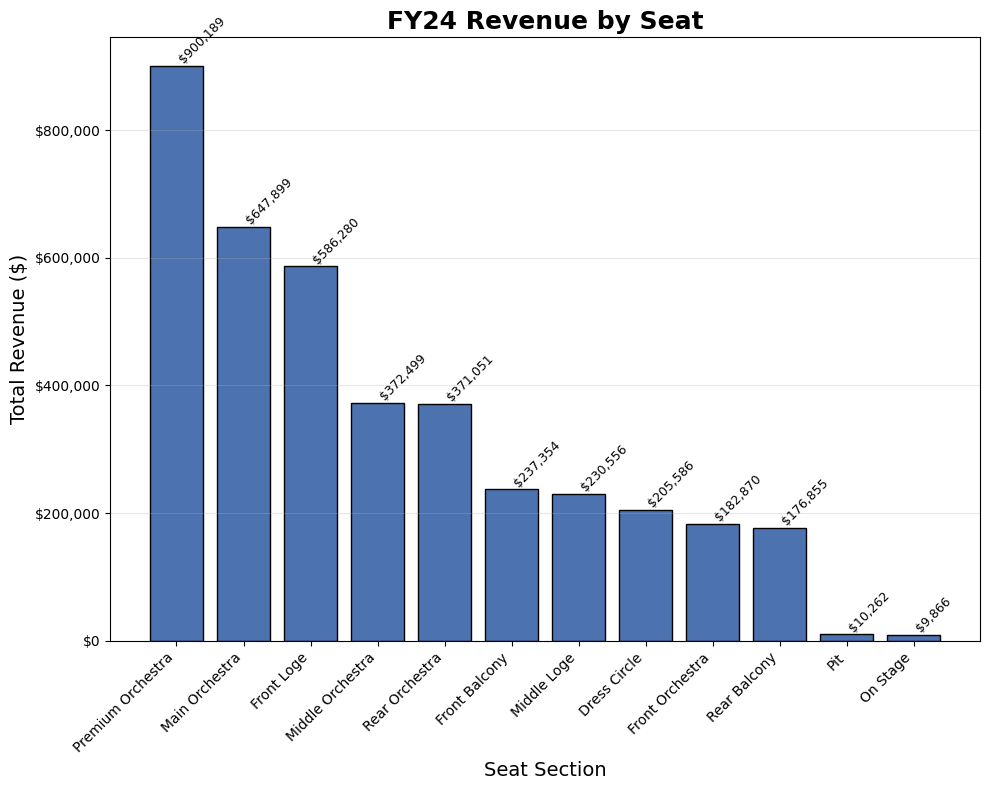

In [23]:
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['price_section', 'paid_amount', 'fiscal_year'])

# === Compute revenue by program and fiscal year ===
revenue_by_program = (
    df.groupby(['fiscal_year', 'price_section'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# === Helper: format y-axis as currency ===
currency_fmt = FuncFormatter(lambda y, _: f'${y:,.0f}')

# === Define fiscal years to visualize ===
fys = ['FY23', 'FY24']
present_fys = [fy for fy in fys if fy in revenue_by_program['fiscal_year'].unique()]

# === Loop through each fiscal year and plot ===
for fy in present_fys:
    sub = revenue_by_program[revenue_by_program['fiscal_year'] == fy].copy()
    sub = sub.sort_values('Total_Revenue', ascending=False)

    # --- Create bar chart ---
    fig, ax = plt.subplots(figsize=(10, 8), facecolor='none')
    ax.set_facecolor('none')  # transparent chart area too

    bars = ax.bar(sub['price_section'], sub['Total_Revenue'], color='#4C72B0', edgecolor='black')

    # Annotate bars with revenue values
    for bar, rev in zip(bars, sub['Total_Revenue']):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"${rev:,.0f}",
            ha='left', va='bottom', fontsize=9, rotation=45
        )

    # --- Chart formatting ---
    ax.yaxis.set_major_formatter(currency_fmt)
    ax.set_title(f'{fy} Revenue by Seat', fontsize=18, fontweight='bold')
    ax.set_xlabel('Seat Section', fontsize=14)
    ax.set_ylabel('Total Revenue ($)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

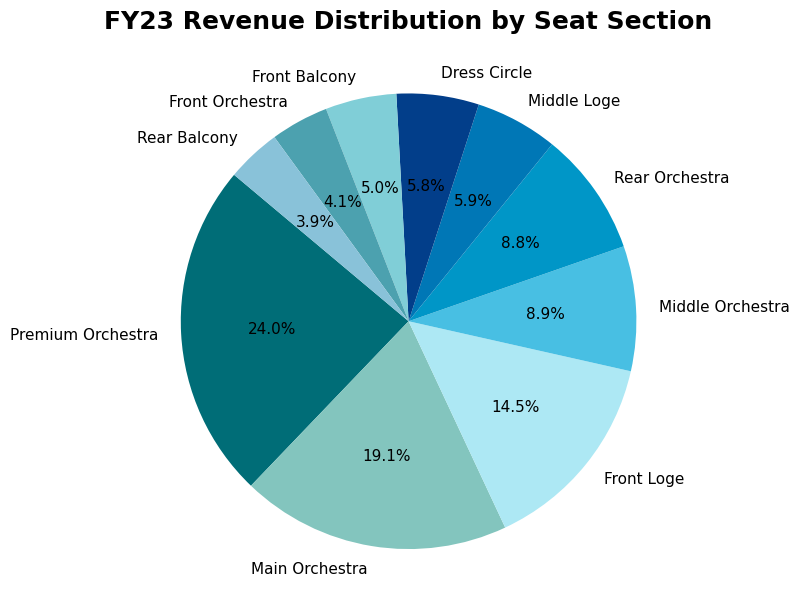

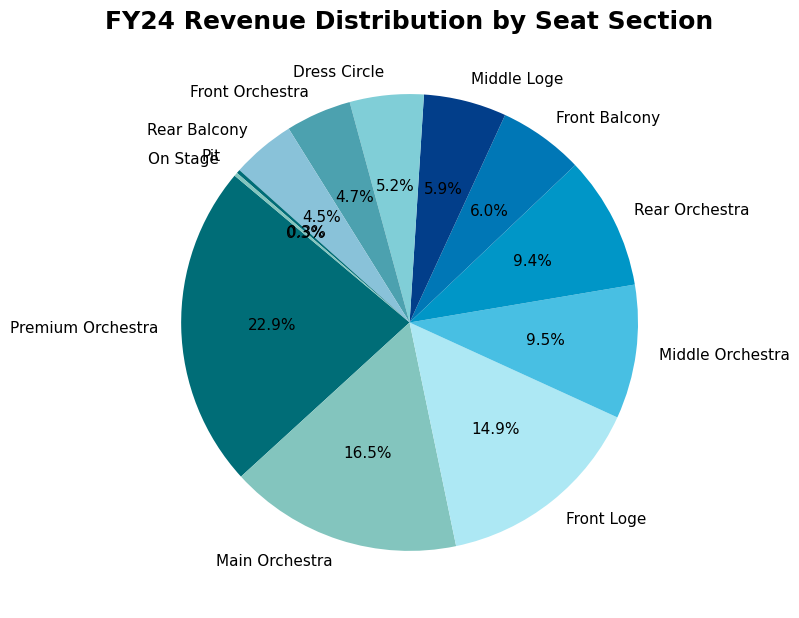

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')

df['price_section'] = (
    df['price_section']
    .astype(str)
    .replace(['nan', 'NaN', 'None', '', ' '], pd.NA)
)
df = df.dropna(subset=['price_section', 'paid_amount', 'fiscal_year'])

# === Compute total revenue by program and fiscal year ===
revenue_by_program = (
    df.groupby(['fiscal_year', 'price_section'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# === Fiscal years to visualize ===
fys = ['FY23', 'FY24']
present_fys = [fy for fy in fys if fy in revenue_by_program['fiscal_year'].unique()]

colors = [
    "#006D77", "#83C5BE", "#ADE8F4", "#48BFE3", "#0096C7",
    "#0077B6", "#023E8A", "#80CED7", "#4CA1AF", "#89C2D9"
]

# === Loop through each fiscal year and create a pie chart ===
for fy in present_fys:
    sub = revenue_by_program[revenue_by_program['fiscal_year'] == fy].copy()
    sub = sub.sort_values('Total_Revenue', ascending=False)
    
    # === Create pie chart ===
    fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')
    wedges, texts, autotexts = ax.pie(
        sub['Total_Revenue'],
        labels=sub['price_section'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 11},
        colors=colors[:len(sub)]
    )
    
    # --- Formatting ---
    ax.set_title(f'{fy} Revenue Distribution by Seat Section', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # === Optional: Save chart as transparent PNG ===
    # plt.savefig(f"{fy}_revenue_by_program_pie.png", dpi=300, transparent=True, bbox_inches='tight')


## Revenue by Membership Type by Fiscal Year

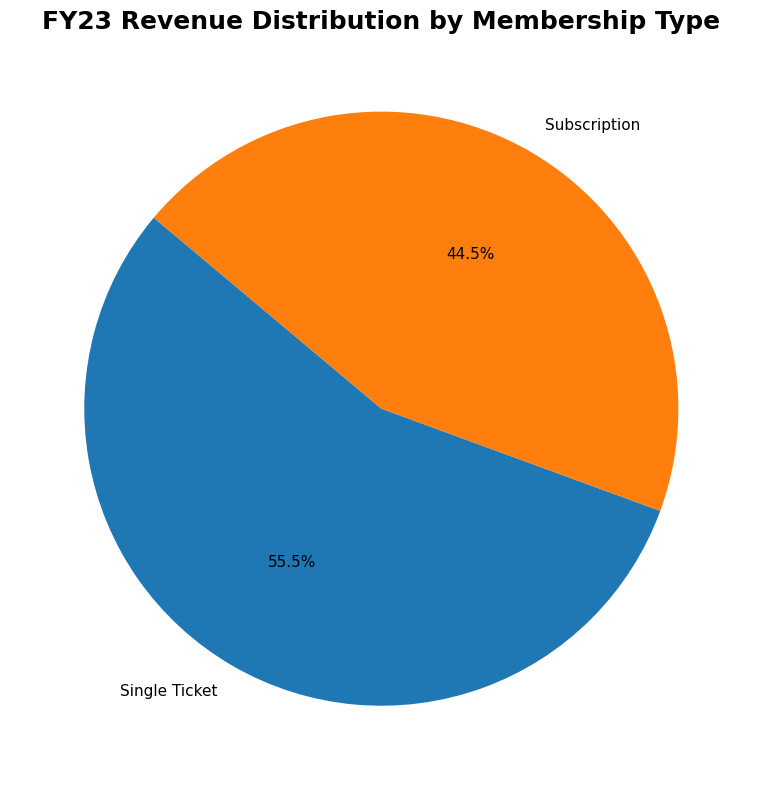

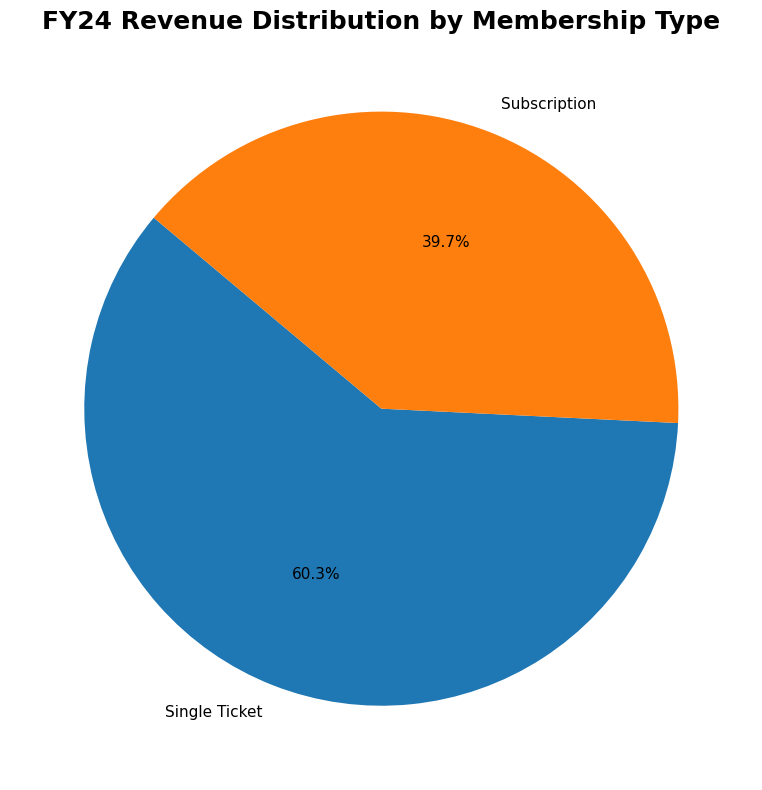

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')

df['ticket_type'] = (
    df['ticket_type']
    .astype(str)
    .replace(['nan', 'NaN', 'None', '', ' '], pd.NA)
)
df = df.dropna(subset=['ticket_type', 'paid_amount', 'fiscal_year'])

# === Compute total revenue by program and fiscal year ===
revenue_by_program = (
    df.groupby(['fiscal_year', 'ticket_type'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# === Fiscal years to visualize ===
fys = ['FY23', 'FY24']
present_fys = [fy for fy in fys if fy in revenue_by_program['fiscal_year'].unique()]

# === Loop through each fiscal year and create a pie chart ===
for fy in present_fys:
    sub = revenue_by_program[revenue_by_program['fiscal_year'] == fy].copy()
    sub = sub.sort_values('Total_Revenue', ascending=False)

    
    # === Create pie chart ===
    fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')
    wedges, texts, autotexts = ax.pie(
        sub['Total_Revenue'],
        labels=sub['ticket_type'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 11}

    )
    
    # --- Formatting ---
    ax.set_title(f'{fy} Revenue Distribution by Membership Type', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # === Optional: Save chart as transparent PNG ===
    # plt.savefig(f"{fy}_revenue_by_program_pie.png", dpi=300, transparent=True, bbox_inches='tight')


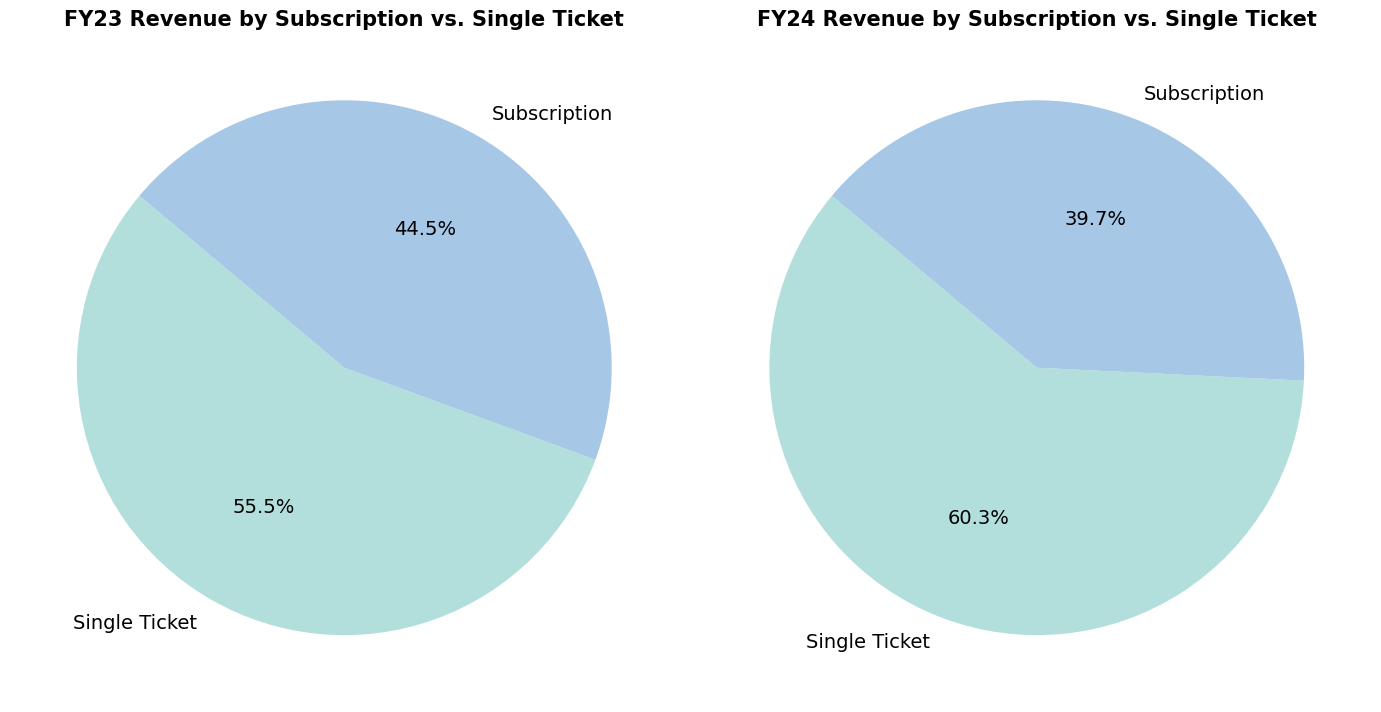

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['ticket_type', 'paid_amount', 'fiscal_year'])

# === Compute total revenue by fiscal year and ticket type ===
revenue_by_program = (
    df.groupby(['fiscal_year', 'ticket_type'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# === Fiscal years to visualize ===
fys = ['FY23', 'FY24']
present_fys = [fy for fy in fys if fy in revenue_by_program['fiscal_year'].unique()]

# === Shared teal–blue color palette ===
colors = [
    "#B2DFDB", "#A7C7E7", "#AEEEEE", "#99CCFF", "#80DEEA",
    "#ADD8E6", "#9AD9DB", "#A2D2FF", "#B3E5FC", "#C2E0F4"
]

# === Create side-by-side pie charts ===
fig, axes = plt.subplots(1, len(present_fys), figsize=(14, 7), facecolor='none')

if len(present_fys) == 1:
    axes = [axes]  # make iterable if only one FY present

for ax, fy in zip(axes, present_fys):
    sub = revenue_by_program[revenue_by_program['fiscal_year'] == fy].copy()
    sub = sub.sort_values('Total_Revenue', ascending=False)

    # === Create pie chart with shared color palette ===
    wedges, texts, autotexts = ax.pie(
        sub['Total_Revenue'],
        labels=sub['ticket_type'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 14},
        colors=colors[:len(sub)]  # same color set across FYs
    )

    ax.set_title(f'{fy} Revenue by Subscription vs. Single Ticket', fontsize=15, fontweight='bold')

# === Formatting ===
plt.tight_layout()
plt.show()


===== Revenue by Membership Type (Excluding Single Ticket) =====
                          price_code_type Total_Revenue Share_%
 Fixed Established Subscription 6 Concert $1,072,326.00   35.6%
                         CYO Subscription   $690,775.67   22.9%
Fixed Established Subscription 24 Concert   $231,759.25    7.7%
              Discounted CYO Subscription   $177,627.00    5.9%
Fixed Established Subscription 12 Concert   $175,824.00    5.8%
    Fixed Established Subscription Sunday   $133,160.50    4.4%
    Fixed Freshman Subscription 6 Concert   $131,456.05    4.4%
   Fixed Sophomore Subscription 6 Concert    $92,660.50    3.1%
Fixed Established Subscription 18 Concert    $50,478.00    1.7%
       Fixed Freshman Subscription Sunday    $35,765.25    1.2%
     Fixed Sophomore  Subscription Sunday    $29,052.50    1.0%
      Fixed Lapsed Subscription 6 Concert    $24,353.50    0.8%
                                    Other   $167,745.80    5.6%


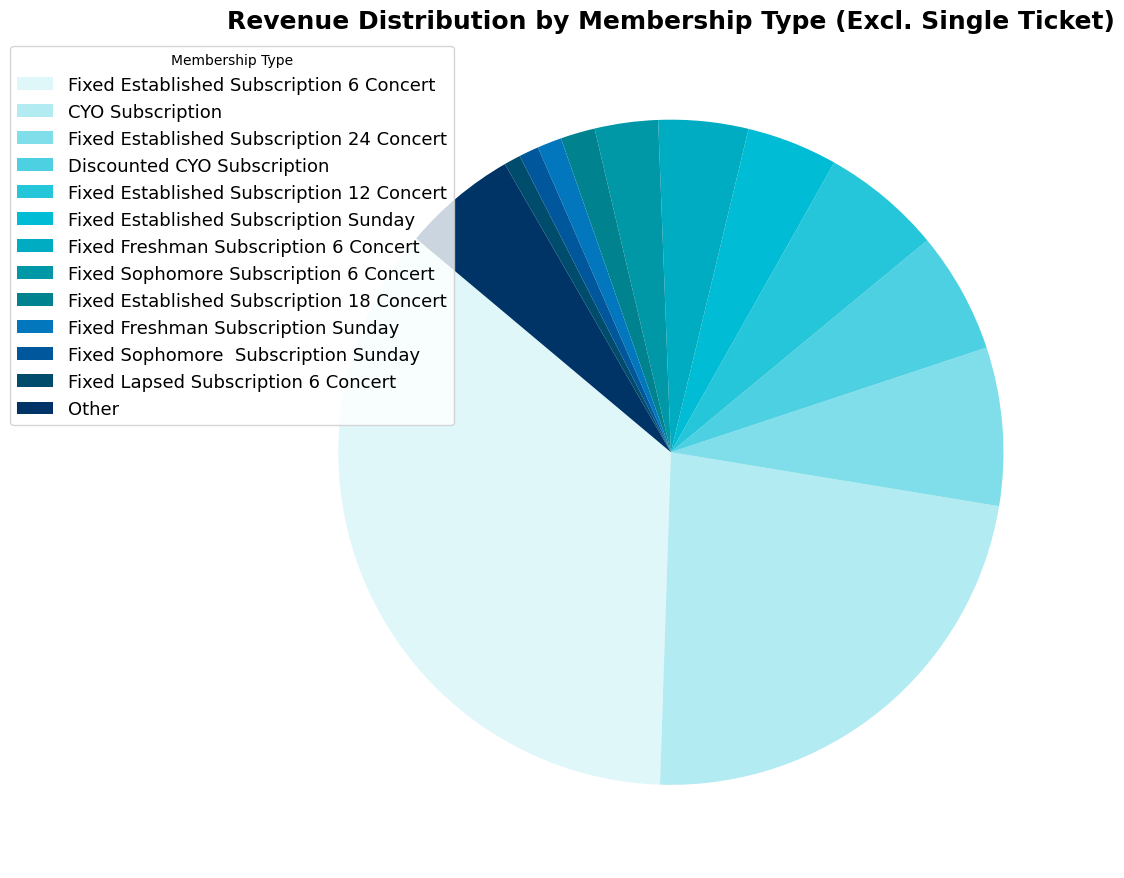

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')

# Normalize and clean the membership type column
df['price_code_type'] = (
    df['price_code_type']
    .astype(str)
    .str.strip()
    .replace(['', 'nan', 'NaN', 'None'], pd.NA)
)

# Drop missing rows
df = df.dropna(subset=['price_code_type', 'paid_amount'])

# === Keep ONLY non–Single Ticket memberships ===
non_single = df[df['price_code_type'].str.lower() != 'single ticket'.lower()].copy()

if non_single.empty:
    raise ValueError("No non–Single Ticket rows found in 'price_code_type'.")

# === Aggregate revenue by membership type ===
rev_by_type = (
    non_single.groupby('price_code_type', as_index=False)['paid_amount']
    .sum()
    .rename(columns={'paid_amount': 'Total_Revenue'})
    .sort_values('Total_Revenue', ascending=False)
)

# Optional: group smaller slices into "Other"
top_n = 12
if len(rev_by_type) > top_n:
    other_sum = rev_by_type['Total_Revenue'].iloc[top_n:].sum()
    rev_by_type = pd.concat(
        [rev_by_type.iloc[:top_n],
         pd.DataFrame({'price_code_type': ['Other'], 'Total_Revenue': [other_sum]})],
        ignore_index=True
    )

# === Print summary ===
rev_by_type['Share_%'] = (rev_by_type['Total_Revenue'] / rev_by_type['Total_Revenue'].sum() * 100).round(2)
print("===== Revenue by Membership Type (Excluding Single Ticket) =====")
print(
    rev_by_type.to_string(
        index=False,
        formatters={'Total_Revenue': '${:,.2f}'.format, 'Share_%': '{:.1f}%'.format}
    )
)

colors = [
    "#E0F7FA",  # very light aqua
    "#B2EBF2",  # pale teal
    "#80DEEA",  # soft turquoise
    "#4DD0E1",  # bright light teal
    "#26C6DA",  # clear cyan teal
    "#00BCD4",  # balanced teal
    "#00ACC1",  # medium teal
    "#0097A7",  # classic teal
    "#00838F",  # deep teal
    "#0277BD",  # medium blue
    "#01579B",  # dark blue
    "#004C6D",  # deep ocean blue
    "#003366"   # navy blue
]

# === Pie chart ===
fig, ax = plt.subplots(figsize=(11, 11), facecolor='none')

# Create pie chart with no labels on slices
wedges, texts = ax.pie(
    rev_by_type['Total_Revenue'],
    labels=None,
    autopct=None,
    startangle=140,
    colors=colors[:len(rev_by_type)]
)

# Add legend (key) in upper right corner
ax.legend(
    wedges,
    rev_by_type['price_code_type'],
    title="Membership Type",
    loc='upper right',
    bbox_to_anchor=(0.25, 1),   # moves legend outside plot if needed
    fontsize=13
)

ax.set_title('Revenue Distribution by Membership Type (Excl. Single Ticket)',
             fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

# === Optional: Save with transparent background ===
# plt.savefig("membership_revenue_pie_key_excl_single_ticket.png", dpi=300, transparent=True, bbox_inches='tight')



===== FY23 Revenue by Membership Type (Excluding Single Ticket) =====
                          price_code_type Total_Revenue Share_%
 Fixed Established Subscription 6 Concert   $504,674.50   34.7%
                         CYO Subscription   $320,365.67   22.0%
Fixed Established Subscription 24 Concert   $119,226.00    8.2%
              Discounted CYO Subscription   $106,920.00    7.3%
Fixed Established Subscription 12 Concert    $84,164.00    5.8%
    Fixed Established Subscription Sunday    $66,281.75    4.6%
    Fixed Freshman Subscription 6 Concert    $64,918.05    4.5%
   Fixed Sophomore Subscription 6 Concert    $44,299.50    3.0%
Fixed Established Subscription 18 Concert    $22,812.50    1.6%
       Fixed Freshman Subscription Sunday    $17,039.00    1.2%
      Fixed Lapsed Subscription 6 Concert    $15,508.00    1.1%
     Fixed Sophomore  Subscription Sunday    $12,753.00    0.9%
                                    Other    $74,879.95    5.2%


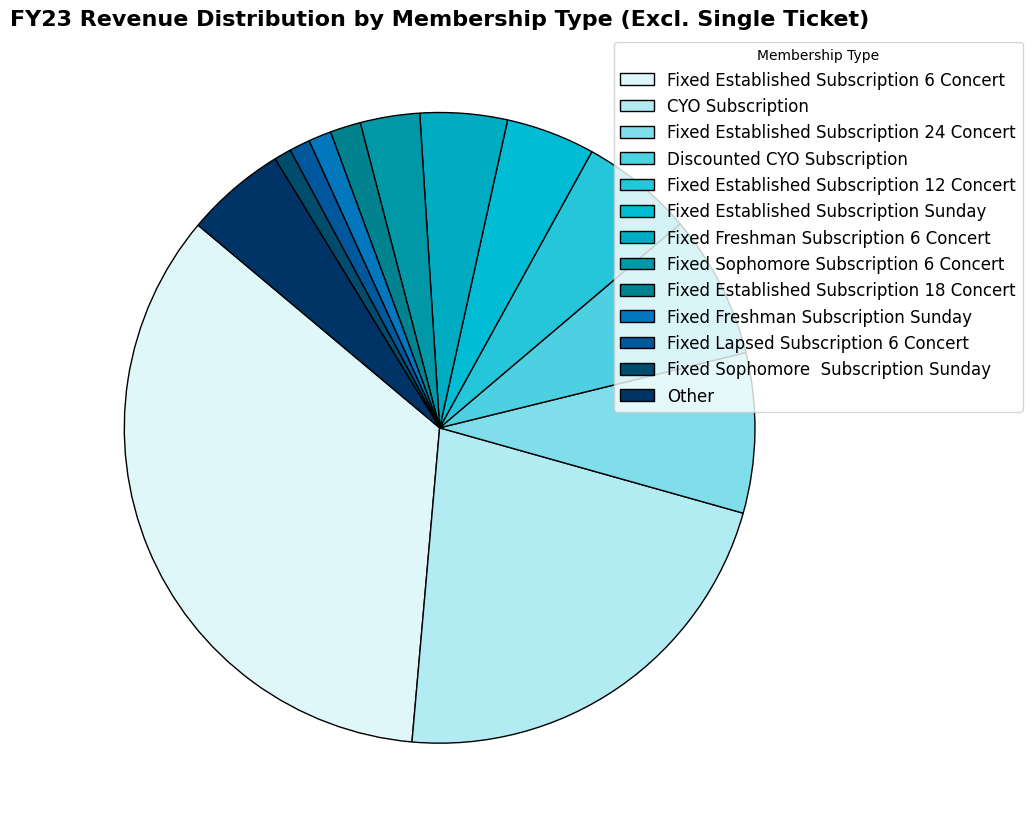


===== FY24 Revenue by Membership Type (Excluding Single Ticket) =====
                          price_code_type Total_Revenue Share_%
 Fixed Established Subscription 6 Concert   $567,651.50   36.4%
                         CYO Subscription   $370,410.00   23.8%
Fixed Established Subscription 24 Concert   $112,533.25    7.2%
Fixed Established Subscription 12 Concert    $91,660.00    5.9%
              Discounted CYO Subscription    $70,707.00    4.5%
    Fixed Established Subscription Sunday    $66,878.75    4.3%
    Fixed Freshman Subscription 6 Concert    $66,538.00    4.3%
   Fixed Sophomore Subscription 6 Concert    $48,361.00    3.1%
Fixed Established Subscription 18 Concert    $27,665.50    1.8%
       Fixed Freshman Subscription Sunday    $18,726.25    1.2%
     Fixed Sophomore  Subscription Sunday    $16,299.50    1.1%
  Fixed Sophomore Subscription 24 Concert    $14,693.50    0.9%
                                    Other    $87,017.85    5.6%


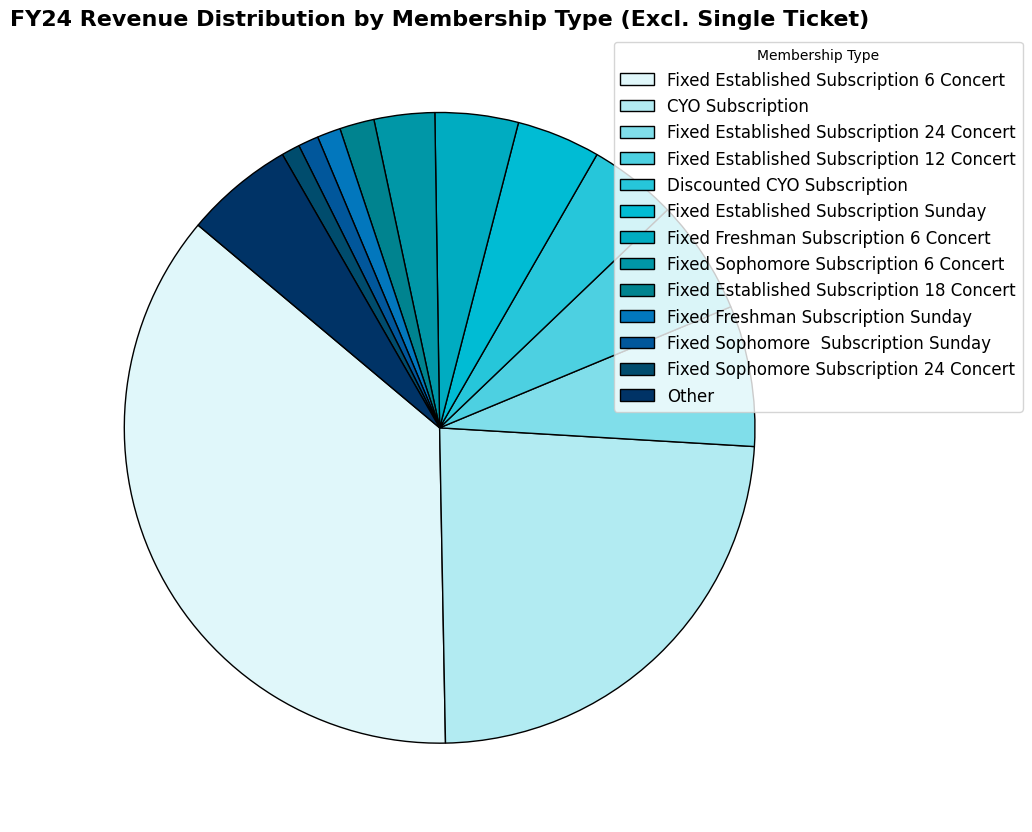

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# === Clean relevant columns ===
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')

# Normalize and clean the membership type column
df['price_code_type'] = (
    df['price_code_type']
    .astype(str)
    .str.strip()
    .replace(['', 'nan', 'NaN', 'None'], pd.NA)
)

# Drop missing rows
df = df.dropna(subset=['price_code_type', 'paid_amount', 'fiscal_year'])

# === Keep ONLY non–Single Ticket memberships ===
non_single = df[df['price_code_type'].str.lower() != 'single ticket'.lower()].copy()

if non_single.empty:
    raise ValueError("No non–Single Ticket rows found in 'price_code_type'.")

# === Fiscal years to visualize ===
fys = ['FY23', 'FY24']
present_fys = [fy for fy in fys if fy in non_single['fiscal_year'].unique()]

# === Loop through each fiscal year and create a pie chart ===
for fy in present_fys:
    sub = non_single[non_single['fiscal_year'] == fy].copy()
    rev_by_type = (
        sub.groupby('price_code_type', as_index=False)['paid_amount']
        .sum()
        .rename(columns={'paid_amount': 'Total_Revenue'})
        .sort_values('Total_Revenue', ascending=False)
    )

    # Optional: group smaller slices into "Other"
    top_n = 12
    if len(rev_by_type) > top_n:
        other_sum = rev_by_type['Total_Revenue'].iloc[top_n:].sum()
        rev_by_type = pd.concat(
            [rev_by_type.iloc[:top_n],
             pd.DataFrame({'price_code_type': ['Other'], 'Total_Revenue': [other_sum]})],
            ignore_index=True
        )

    # === Print summary ===
    rev_by_type['Share_%'] = (
        rev_by_type['Total_Revenue'] / rev_by_type['Total_Revenue'].sum() * 100
    ).round(2)

    print(f"\n===== {fy} Revenue by Membership Type (Excluding Single Ticket) =====")
    print(
        rev_by_type.to_string(
            index=False,
            formatters={'Total_Revenue': '${:,.2f}'.format, 'Share_%': '{:.1f}%'.format}
        )
    )

    colors = [
    "#E0F7FA",  # very light aqua
    "#B2EBF2",  # pale teal
    "#80DEEA",  # soft turquoise
    "#4DD0E1",  # bright light teal
    "#26C6DA",  # clear cyan teal
    "#00BCD4",  # balanced teal
    "#00ACC1",  # medium teal
    "#0097A7",  # classic teal
    "#00838F",  # deep teal
    "#0277BD",  # medium blue
    "#01579B",  # dark blue
    "#004C6D",  # deep ocean blue
    "#003366"   # navy blue
]

    # === Pie chart ===
    fig, ax = plt.subplots(figsize=(10, 10), facecolor='none')

    # Create pie chart with no labels on slices
    wedges, texts = ax.pie(
        rev_by_type['Total_Revenue'],
        labels=None,
        startangle=140,
        wedgeprops={'edgecolor': 'black'},
        colors=colors[:len(rev_by_type)]
    )

    # Add legend (key) in upper right corner
    ax.legend(
        wedges,
        rev_by_type['price_code_type'],
        title="Membership Type",
        loc='upper right',
        bbox_to_anchor=(1.25, 1),   # adjust placement as needed
        fontsize=12
    )

    ax.set_title(f'{fy} Revenue Distribution by Membership Type (Excl. Single Ticket)',
                 fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # === Optional: Save with transparent background ===
    # plt.savefig(f"{fy}_membership_revenue_pie.png", dpi=300, transparent=True, bbox_inches='tight')



FY23 Top 3 events:
                   Name paid_amount
Beethoven Symphony No 9 $263,815.75
 Christmas with the ASO $257,727.20
   Beethoven and Bolero $221,197.70

Revenue split (Subscriber vs Single Ticket):
                   Name  ticket_group Total_Revenue Share_%
Beethoven Symphony No 9 Single Ticket   $167,973.50   63.7%
Beethoven Symphony No 9    Subscriber    $95,842.25   36.3%
   Beethoven and Bolero Single Ticket   $109,966.50   49.7%
   Beethoven and Bolero    Subscriber   $111,231.20   50.3%
 Christmas with the ASO Single Ticket   $257,727.20  100.0%


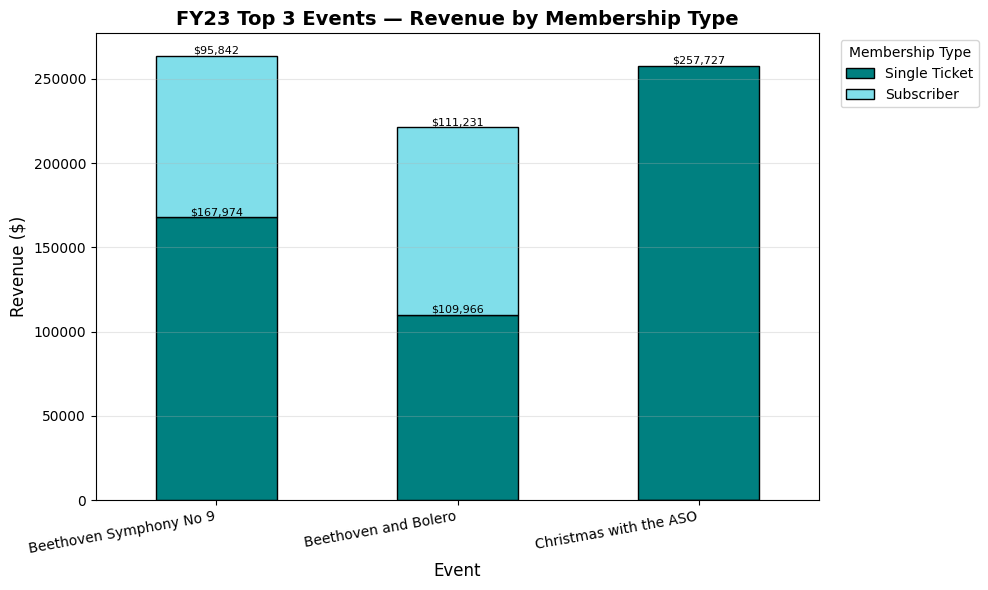

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load & clean ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['fiscal_year', 'Name', 'ticket_type', 'paid_amount'])

# Focus on FY23
fy23 = df[df['fiscal_year'] == 'FY23'].copy()

# Top 3 highest-grossing events (by Name)
top3 = (
    fy23.groupby('Name', as_index=False)['paid_amount']
        .sum()
        .sort_values('paid_amount', ascending=False)
        .head(3)
)
top3_names = top3['Name'].tolist()

# Keep only those events
d = fy23[fy23['Name'].isin(top3_names)].copy()

# Keep only Subscribers vs Single Ticket (drop others)
t = d['ticket_type'].astype(str).str.strip()
mask = t.str.contains('sub', case=False) | t.str.contains('single', case=False)
d = d[mask].copy()

# Normalize to exactly two labels
d.loc[t.str.contains('sub', case=False), 'ticket_group'] = 'Subscriber'
d.loc[t.str.contains('single', case=False), 'ticket_group'] = 'Single Ticket'

# Revenue by event x ticket_group
rev = (
    d.groupby(['Name', 'ticket_group'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# Percent share within each event — use TRANSFORM (fixes your error)
rev['Share_%'] = (
    rev.groupby('Name')['Total_Revenue']
       .transform(lambda x: x / x.sum() * 100)
       .round(1)
)

print("\nFY23 Top 3 events:")
print(top3.to_string(index=False, formatters={'paid_amount': '${:,.2f}'.format}))
print("\nRevenue split (Subscriber vs Single Ticket):")
print(rev.to_string(index=False, formatters={'Total_Revenue': '${:,.2f}'.format, 'Share_%': '{:.1f}%'.format}))

# === Stacked bar chart ===
pivot = rev.pivot(index='Name', columns='ticket_group', values='Total_Revenue').fillna(0)

ax = pivot.plot(
    kind='bar', stacked=True, figsize=(10, 6), 
    color={'Subscriber': '#80DEEA', 'Single Ticket': '#008080'},  # dark blue, teal
    edgecolor='black'
)

plt.title("FY23 Top 3 Events — Revenue by Membership Type", fontsize=14, fontweight='bold')
plt.xlabel("Event", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=10, ha='right')
plt.legend(title="Membership Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Dollar labels on stacks
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(
            p.get_x() + p.get_width()/2, p.get_y() + p.get_height(),
            f"${p.get_height():,.0f}",
            ha='center', va='bottom', fontsize=8
        )

plt.tight_layout()
plt.show()



FY24 Top 3 events:
                     Name paid_amount
   Christmas with the ASO $303,856.00
     Orff: Carmina Burana $290,730.75
Beethoven Violin Concerto $208,596.50

Revenue split (Subscriber vs Single Ticket):
                     Name  ticket_group Total_Revenue Share_%
Beethoven Violin Concerto Single Ticket    $86,986.60   41.7%
Beethoven Violin Concerto    Subscriber   $121,609.90   58.3%
   Christmas with the ASO Single Ticket   $303,856.00  100.0%
     Orff: Carmina Burana Single Ticket   $199,347.50   68.6%
     Orff: Carmina Burana    Subscriber    $91,383.25   31.4%


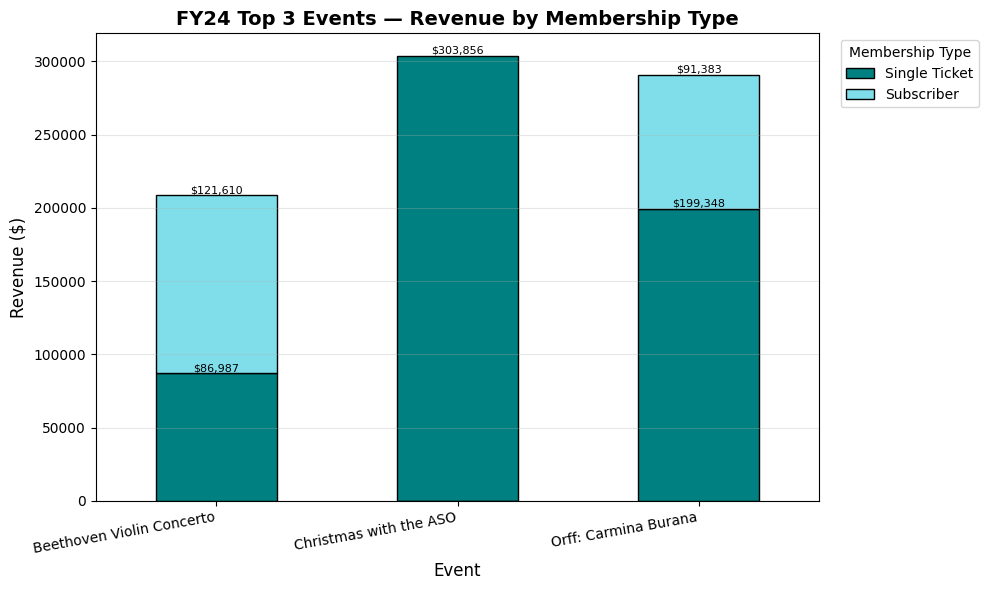

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load & clean ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['fiscal_year', 'Name', 'ticket_type', 'paid_amount'])

# Focus on FY23
fy23 = df[df['fiscal_year'] == 'FY24'].copy()

# Top 3 highest-grossing events (by Name)
top3 = (
    fy23.groupby('Name', as_index=False)['paid_amount']
        .sum()
        .sort_values('paid_amount', ascending=False)
        .head(3)
)
top3_names = top3['Name'].tolist()

# Keep only those events
d = fy23[fy23['Name'].isin(top3_names)].copy()

# Keep only Subscribers vs Single Ticket (drop others)
t = d['ticket_type'].astype(str).str.strip()
mask = t.str.contains('sub', case=False) | t.str.contains('single', case=False)
d = d[mask].copy()

# Normalize to exactly two labels
d.loc[t.str.contains('sub', case=False), 'ticket_group'] = 'Subscriber'
d.loc[t.str.contains('single', case=False), 'ticket_group'] = 'Single Ticket'

# Revenue by event x ticket_group
rev = (
    d.groupby(['Name', 'ticket_group'], as_index=False)['paid_amount']
      .sum()
      .rename(columns={'paid_amount': 'Total_Revenue'})
)

# Percent share within each event — use TRANSFORM (fixes your error)
rev['Share_%'] = (
    rev.groupby('Name')['Total_Revenue']
       .transform(lambda x: x / x.sum() * 100)
       .round(1)
)

print("\nFY24 Top 3 events:")
print(top3.to_string(index=False, formatters={'paid_amount': '${:,.2f}'.format}))
print("\nRevenue split (Subscriber vs Single Ticket):")
print(rev.to_string(index=False, formatters={'Total_Revenue': '${:,.2f}'.format, 'Share_%': '{:.1f}%'.format}))

# === Stacked bar chart ===
pivot = rev.pivot(index='Name', columns='ticket_group', values='Total_Revenue').fillna(0)

ax = pivot.plot(
    kind='bar', stacked=True, figsize=(10, 6), 
    color={'Subscriber': '#80DEEA', 'Single Ticket': '#008080'},  # dark blue, teal
    edgecolor='black'
)

plt.title("FY24 Top 3 Events — Revenue by Membership Type", fontsize=14, fontweight='bold')
plt.xlabel("Event", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=10, ha='right')
plt.legend(title="Membership Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Dollar labels on stacks
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(
            p.get_x() + p.get_width()/2, p.get_y() + p.get_height(),
            f"${p.get_height():,.0f}",
            ha='center', va='bottom', fontsize=8
        )

plt.tight_layout()
plt.show()


FY23 Peak Season — Revenue by Membership Type:
 ticket_group Total_Revenue Share_%
   Subscriber   $891,464.02   73.0%
Single Ticket   $328,894.20   27.0%


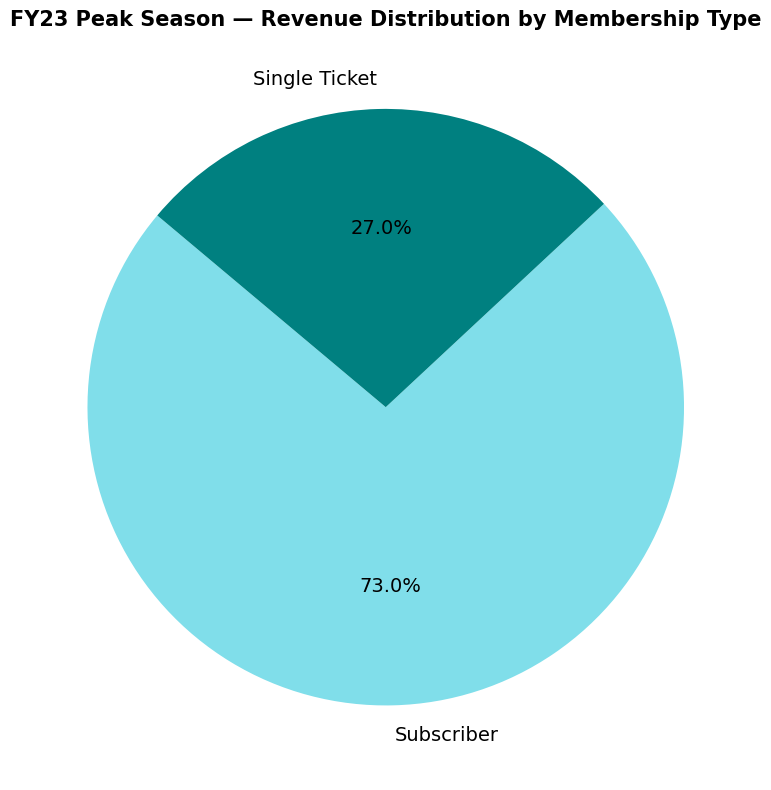

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load & clean data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# Convert to numeric and clean
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['fiscal_year', 'season_period', 'ticket_type', 'paid_amount'])

# === Filter for FY23 and 'Peak' season ===
fy23_peak = df[(df['fiscal_year'] == 'FY23') & (df['season_period'].str.lower() == 'peak')].copy()

# Safety check
if fy23_peak.empty:
    raise ValueError("No data found for FY23 Peak season. Check 'season_period' capitalization or spelling.")

# === Normalize ticket_type column to group Subscribers and Single Ticket Buyers ===
fy23_peak['ticket_type'] = fy23_peak['ticket_type'].astype(str).str.strip()

fy23_peak.loc[fy23_peak['ticket_type'].str.contains('sub', case=False), 'ticket_group'] = 'Subscriber'
fy23_peak.loc[fy23_peak['ticket_type'].str.contains('single', case=False), 'ticket_group'] = 'Single Ticket'

# Fill anything else as 'Other'
fy23_peak['ticket_group'] = fy23_peak['ticket_group'].fillna('Other')

# === Compute revenue by ticket_group ===
rev_by_type = (
    fy23_peak.groupby('ticket_group', as_index=False)['paid_amount']
              .sum()
              .rename(columns={'paid_amount': 'Total_Revenue'})
              .sort_values('Total_Revenue', ascending=False)
)

# === Add percentage share ===
total_revenue = rev_by_type['Total_Revenue'].sum()
rev_by_type['Share_%'] = (rev_by_type['Total_Revenue'] / total_revenue * 100).round(1)

# === Print results ===
print("FY23 Peak Season — Revenue by Membership Type:")
print(
    rev_by_type.to_string(
        index=False,
        formatters={'Total_Revenue': '${:,.2f}'.format, 'Share_%': '{:.1f}%'.format}
    )
)

# === Pie chart visualization ===
colors = ['#80DEEA', '#008080', '#66B2B2']  # dark blue, teal, light teal
fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')

wedges, texts, autotexts = ax.pie(
    rev_by_type['Total_Revenue'],
    labels=rev_by_type['ticket_group'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(rev_by_type)],
    textprops={'fontsize': 14}
)

ax.set_title('FY23 Peak Season — Revenue Distribution by Membership Type', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


FY24 Peak Season — Revenue by Membership Type:
 ticket_group Total_Revenue Share_%
   Subscriber   $976,128.10   60.3%
Single Ticket   $642,463.58   39.7%


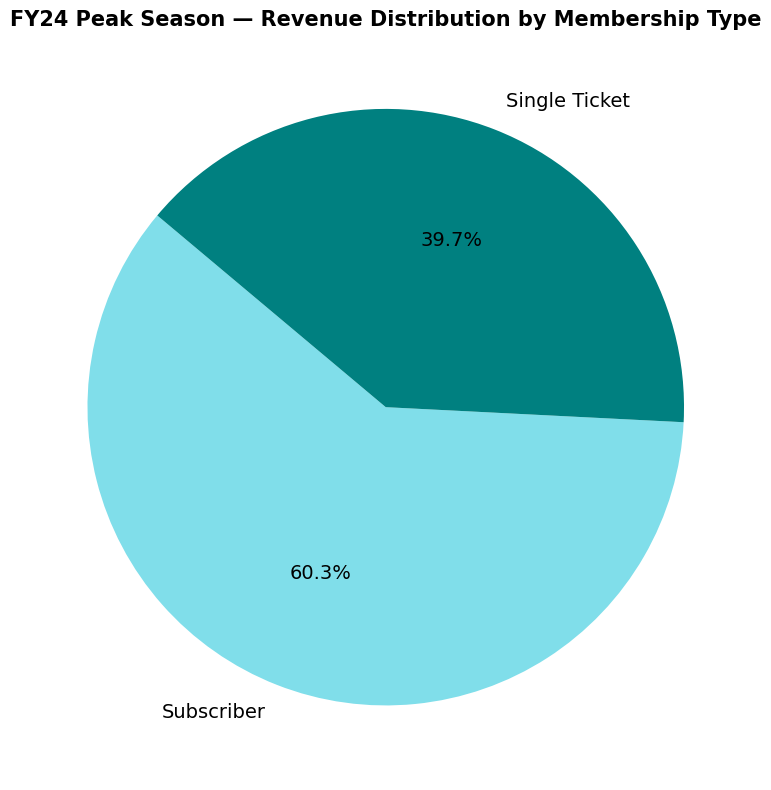

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load & clean data ===
file_path = "/Users/jiwonson/Desktop/ECON 540/ASO/master_tickets.csv"
df = pd.read_csv(file_path)

# Convert to numeric and clean
df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce')
df = df.dropna(subset=['fiscal_year', 'season_period', 'ticket_type', 'paid_amount'])

# === Filter for FY23 and 'Peak' season ===
fy24_peak = df[(df['fiscal_year'] == 'FY24') & (df['season_period'].str.lower() == 'peak')].copy()

# Safety check
if fy24_peak.empty:
    raise ValueError("No data found for FY24 Peak season. Check 'season_period' capitalization or spelling.")

# === Normalize ticket_type column to group Subscribers and Single Ticket Buyers ===
fy24_peak['ticket_type'] = fy24_peak['ticket_type'].astype(str).str.strip()

fy24_peak.loc[fy24_peak['ticket_type'].str.contains('sub', case=False), 'ticket_group'] = 'Subscriber'
fy24_peak.loc[fy24_peak['ticket_type'].str.contains('single', case=False), 'ticket_group'] = 'Single Ticket'

# Fill anything else as 'Other'
fy24_peak['ticket_group'] = fy24_peak['ticket_group'].fillna('Other')

# === Compute revenue by ticket_group ===
rev_by_type = (
    fy24_peak.groupby('ticket_group', as_index=False)['paid_amount']
              .sum()
              .rename(columns={'paid_amount': 'Total_Revenue'})
              .sort_values('Total_Revenue', ascending=False)
)

# === Add percentage share ===
total_revenue = rev_by_type['Total_Revenue'].sum()
rev_by_type['Share_%'] = (rev_by_type['Total_Revenue'] / total_revenue * 100).round(1)

# === Print results ===
print("FY24 Peak Season — Revenue by Membership Type:")
print(
    rev_by_type.to_string(
        index=False,
        formatters={'Total_Revenue': '${:,.2f}'.format, 'Share_%': '{:.1f}%'.format}
    )
)

# === Pie chart visualization ===
colors = ['#80DEEA', '#008080', '#66B2B2']  # dark blue, teal, light teal
fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')

wedges, texts, autotexts = ax.pie(
    rev_by_type['Total_Revenue'],
    labels=rev_by_type['ticket_group'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(rev_by_type)],
    textprops={'fontsize': 14}
)

ax.set_title('FY24 Peak Season — Revenue Distribution by Membership Type', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
